✅ Concept: What is Clustering?
Clustering is the process of grouping data points that are similar to each other.
There are no labels — the algorithm finds the structure itself.

🔍 Why it matters:

Customer segmentation
Market basket analysis
Document grouping
Anomaly detection


steps:
- kmeans
- elbow method
- pca
- t-sne

🧠 Popular Clustering Algorithms

K-Means Clustering (centroid-based)
DBSCAN (density-based)
Hierarchical Clustering (tree-based)

We'll start with K-Means since it's the most intuitive and widely used.

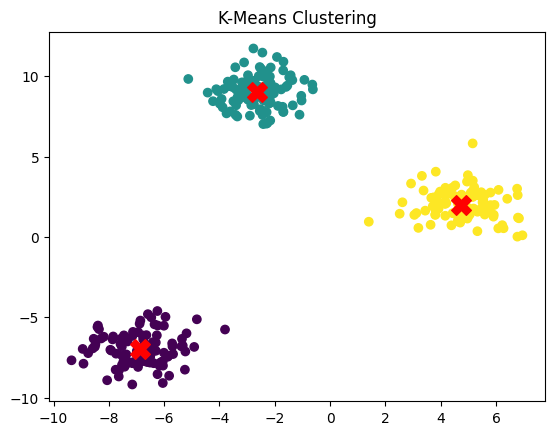

In [1]:
# ✅ Step 1: K-Means Clustering Basics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Fit KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.labels_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering")
plt.show()


✅ What’s happening:

make_blobs() → creates sample cluster-like data
KMeans() → creates a clustering model
.fit() → applies it to data
.labels_ → gets assigned cluster for each point

✅ Step 2: Choosing the Right Number of Clusters (Elbow Method)
When using K-Means, you must predefine the number of clusters (k).
But how do we choose the best k?

💡 Elbow Method
We calculate inertia (sum of squared distances of points from their closest cluster center) for different values of k.

Then, we plot and look for a point where the drop in inertia slows down — this is the elbow.

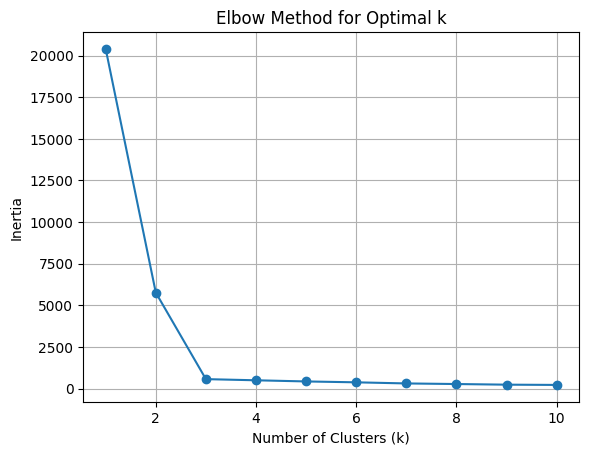

In [ ]:
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Inertia - The elbow method plots inertia against different values of k. As k increases, the clusters become smaller and more tightly packed, leading to a decrease in inertia. The goal is to find the "elbow" point where adding more clusters doesn't significantly reduce inertia, indicating that the optimal number of clusters has been reached

# Plot the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

✅ What’s happening:

- We test k from 1 to 10
- Plot inertia vs. k
- The "elbow" point (where the curve bends) is the best value for k

✅ Step 3: KMeans Clustering on Real Data (Mall Customers Dataset)
Let’s apply KMeans to a real-world dataset:
Mall Customer Segmentation

📥 Dataset Columns:
CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1–100)

We’ll cluster customers based on:
Annual Income
Spending Score

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male 

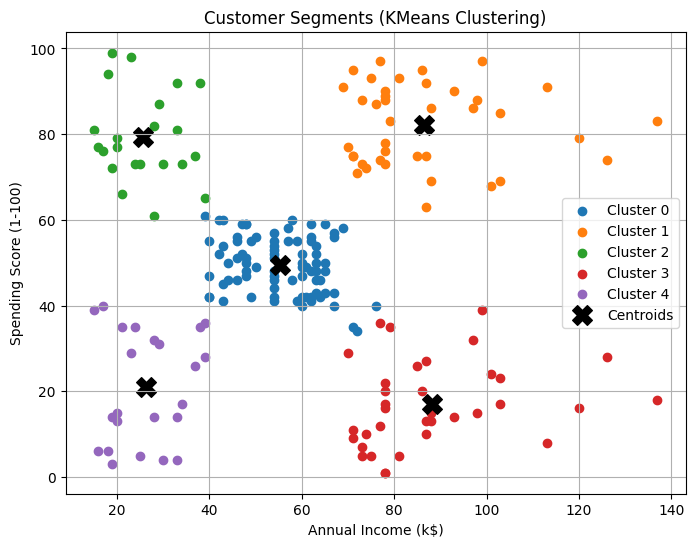

In [ ]:
# https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data
df = pd.read_csv("./Mall_Customers.csv")
print(df)

# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
# selecting the two columns from your DataFrame that you want to use for clustering:
# Annual Income (in thousands of dollars)
# Spending Score (1–100 scale)
# This new variable X is your feature matrix, used as input to the algorithm.

# Fit KMeans
kmeans = KMeans(n_clusters=5, random_state=42) # telling kmeans model to divide the data into 5 clusters
#n_clusters=5 → You assume there are 5 types of customer behavior groups. setup is done next train model - fit
df['Cluster'] = kmeans.fit_predict(X)
print(df)
# fit_predict(X) does 2 things:
# Fit: It runs the KMeans algorithm on your data (assigns clusters).
# Predict: It returns a list of cluster labels (0 to 4) for each row.

# 🎯 What you get after this:
# Every customer in the dataset is now assigned a Cluster number (0 to 4)
# These groupings can be visualized or analyzed separately to understand customer types.

# Visualize
plt.figure(figsize=(8, 6))
for cluster in range(5):
    cluster_points = df[df['Cluster'] == cluster] #Filters the DataFrame to get only the rows (customers) that belong to the current cluster. df['Cluster'] == cluster is a condition that returns only data points in that cluster.
    plt.scatter(cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'], label=f"Cluster {cluster}") #label sets legend

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (KMeans Clustering)')
plt.legend()
plt.grid(True)
plt.show()


✅ This helps businesses group customers:

High Income + High Spend → VIPs
Low Income + High Spend → Bargain lovers
High Income + Low Spend → Cautious buyers
etc.

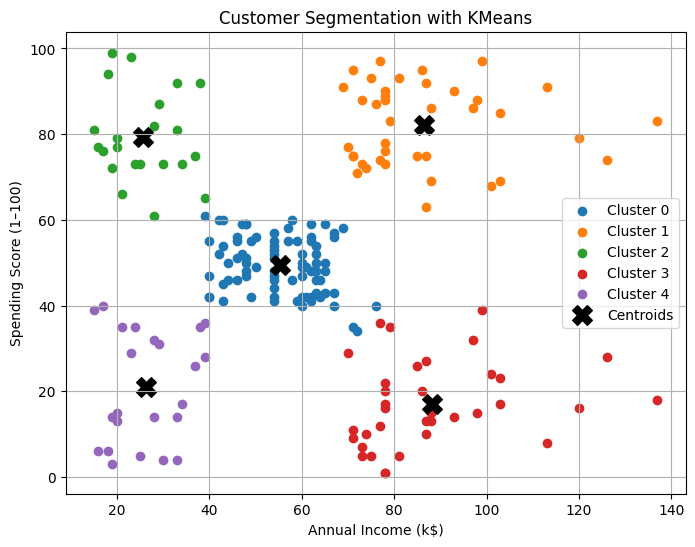

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 2. Fit model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# 3. Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(5):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Annual Income (k$)'], 
                cluster_points['Spending Score (1-100)'], 
                label=f"Cluster {cluster}")

# 4. Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], 
            c='black', s=200, marker='X', label='Centroids')

# 5. Labels and final touches
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.title("Customer Segmentation with KMeans")
plt.legend()
plt.grid(True)
plt.show()


✅ What This Does:

Plots each cluster in a different color
Adds big black 'X' markers for cluster centers (centroids)
Helps you visually understand how customers are grouped

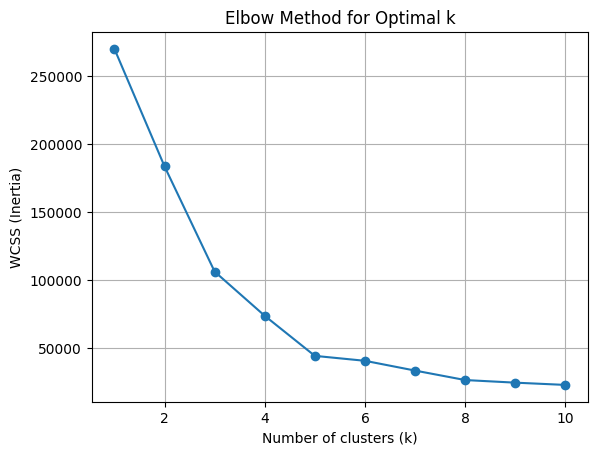

In [10]:
# 📉 STEP: Elbow Method (to find optimal k)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 1. Try different values of k (number of clusters)
wcss = []  # within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia = WCSS

# 2. Plot elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


✅ What This Does:
Plots the within-cluster error (WCSS) for each k (1 to 10)
The point where the curve "bends" like an elbow is the optimal k

❓How to Decide Best k?
Look for a sharp "elbow point" where the drop in WCSS becomes smaller.
For example, if the elbow appears at k = 5, that means 5 clusters is best.

In our case, based on common retail data — the elbow usually appears at k = 5, which is why we used it earlier.

🏁 Project: Customer Segmentation for a Fashion Brand

📦 Dataset:
Simulated customer data:
customer_id, age, gender, income, spending_score, membership_years

In [11]:
# 🧩 STEP 1: Create the dataset
import pandas as pd
import numpy as np

np.random.seed(42)

n = 200
df = pd.DataFrame({
    'CustomerID': range(1, n+1),
    'Age': np.random.randint(18, 60, size=n),
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'Annual Income (k$)': np.random.randint(20, 120, size=n),
    'Spending Score (1-100)': np.random.randint(10, 100, size=n),
    'Membership Years': np.random.randint(1, 10, size=n)
})

print(df.head())


   CustomerID  Age  Gender  Annual Income (k$)  Spending Score (1-100)  \
0           1   56    Male                  43                      45   
1           2   46  Female                  51                      91   
2           3   32  Female                  66                      33   
3           4   25    Male                 105                      32   
4           5   38  Female                  42                      71   

   Membership Years  
0                 5  
1                 3  
2                 1  
3                 5  
4                 9  


In [12]:
# 🧩 STEP 2: Encode Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
# 🧩 STEP 3: Normalize numeric columns
from sklearn.preprocessing import StandardScaler

# 5 features
features = ['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)', 'Membership Years']
scaler = StandardScaler()
scaled = scaler.fit_transform(df[features])


In [14]:
# 🧩 STEP 4: Apply KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled)

df['Cluster'] = clusters
print(df.groupby('Cluster').mean())


         CustomerID        Age    Gender  Annual Income (k$)  \
Cluster                                                        
0        106.452381  45.619048  0.880952           44.714286   
1         90.409091  34.863636  0.000000           79.727273   
2        108.785714  47.452381  0.000000           65.976190   
3         93.606061  31.393939  0.969697           77.454545   
4        102.384615  32.153846  0.974359           79.153846   

         Spending Score (1-100)  Membership Years  
Cluster                                            
0                     37.690476          5.809524  
1                     36.886364          3.204545  
2                     69.190476          5.976190  
3                     66.272727          7.333333  
4                     55.871795          2.102564  


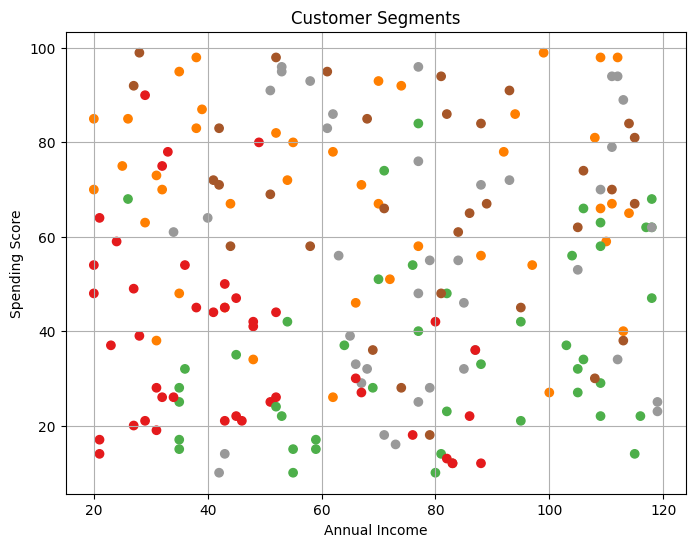

In [15]:
# 🧩 STEP 5: Visualize clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='Set1')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.grid(True)
plt.show()


✅ Final Deliverables:
Clustering applied to real-world-like data

Insight: Which type of customer spends more? Which cluster is most loyal?

📉 NEXT CONCEPT: Dimensionality Reduction (Start with PCA)

✅ Why It Matters
High-dimensional data is hard to visualize, slow to process, and may be noisy.

Dimensionality Reduction helps:
- Improve training speed and model performance
- Visualize clusters/patterns in 2D or 3D
- Remove noise while preserving structure

🔍 Concept: Principal Component Analysis (PCA)
- PCA finds the directions (principal components) that capture the most variance in your data.
- It rotates and transforms your feature space to reduce dimensions (e.g., from 5D to 2D).
- It helps visualize clusters, especially after clustering.

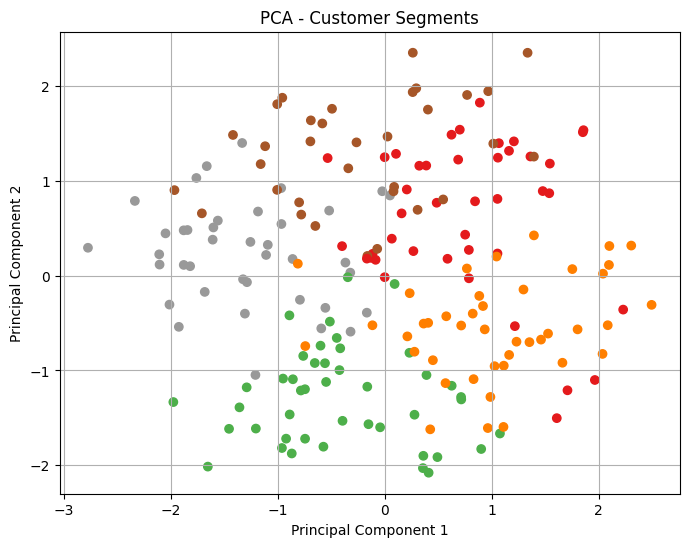

In [16]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled)

# Add to DataFrame for plotting
df['PCA1'] = reduced[:, 0]
df['PCA2'] = reduced[:, 1]

# Visualize
plt.figure(figsize=(8,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='Set1')
plt.title("PCA - Customer Segments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


🧠 What PCA did:

- Took all 5 features
- Projected the data onto the top 2 directions that explain the most variance
- Helped us visually confirm if clusters are meaningful

# In dataset:
['Age', 'Income', 'Spending Score', 'Savings', 'Debt']  # (example)
👉 These are 5 different columns, and together they form a 5D space.
# Each customer is a point in 5D space.
But we can't visualize 5D data directly.


🎯 What PCA does:
"PCA finds the top 2 directions (Principal Components) that capture the most information (variance) in that 5D data."
So after applying:

# reduced = pca.fit_transform(scaled)  # scaled has 5 features
It returns a new 2D array like:
# [[PCA1, PCA2],
# [PCA1, PCA2],
#  ...]
These 2 components now represent the whole 5D data, but in just 2 dimensions, capturing the most meaningful structure.


📊 Visualization:
# plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'])
We plot these new 2D points, colored by cluster, and now we can visually check:
- Are clusters separated?
- Is PCA good enough to keep the structure?

Let’s now see what PCA1 and PCA2 really are — and how much of the original information they retain.

In [ ]:
# #Assume we had this dataset of 5 features per customer:
# # features = ['Age', 'Income', 'Spending Score', 'Savings', 'Debt']

# # ✅ We scaled it:
# # from sklearn.preprocessing import StandardScaler
# # scaled = StandardScaler().fit_transform(df[features])

# # ✅ Then applied PCA:
# # from sklearn.decomposition import PCA
# # pca = PCA(n_components=2)
# # reduced = pca.fit_transform(scaled)

# # ✅ Now check what PCA gave us:
print(reduced[:5])  # See first 5 customers
# # This shows something like:
# # [[ 2.1, -0.4],
# #  [ 1.7,  0.2],
# #  [-1.5,  2.3],
# #  ...
# # ]
# # these are the PCA1 and PCA2 values — coordinates in the 2D compressed space.

# # 📊 How much variance did PCA capture?
# # This tells us how much of the original data's meaning is preserved:
# print(pca.explained_variance_ratio_)
# [0.53, 0.31]


# # 🧠 That means:

# # PCA1 captures 53% of the variance
# # PCA2 captures 31%
# # 🔹 Together: 84% of original info is retained!
# # This is very good — we compressed 5D → 2D but kept most of the meaning.

# ✅ You can also add this back to your DataFrame:
# df['PCA1'] = reduced[:, 0]
# df['PCA2'] = reduced[:, 1]
# Now you can use df[['PCA1', 'PCA2']] for plotting, clustering, etc.


[[ 1.66018137 -0.91859013]
 [ 0.04783052  0.8442675 ]
 [-1.3255496  -0.03872487]
 [-0.95213194 -1.08538522]
 [ 0.96643393  1.94333641]]
[0.25021703 0.22907995]


# t-SNE, a powerful tool for visualizing complex, high-dimensional data clusters.

🔍 What is t-SNE?

- Full form: 
t-Distributed Stochastic Neighbor Embedding

- Goal: 
Reduces high-dimensional data to 2D or 3D while preserving local structure (i.e., similar points stay close)

- Use case:
Great for visualizing clusters, especially when PCA fails to separate them clearly

In [23]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(scaled)

# Add to DataFrame
df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]


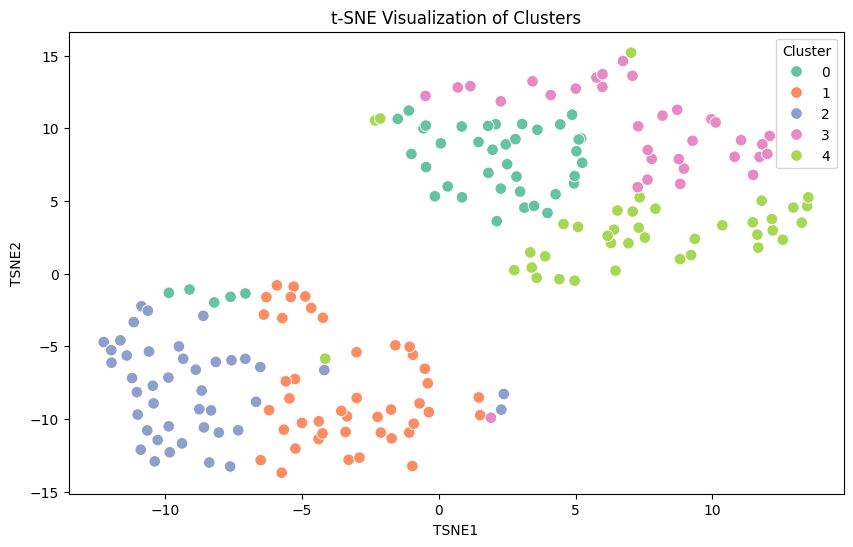

In [24]:
# 📈 Visualize t-SNE Output
# Assuming your clusters are stored in df['Cluster']:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=70)
plt.title('t-SNE Visualization of Clusters')
plt.show()


🔍 Interpretation:

- Unlike PCA (which is linear), t-SNE is non-linear, so it can find curved, non-obvious boundaries.
- Each point’s position doesn't have an axis meaning — just relative proximity matters.

🧪 Mini Project: Customer Segmentation from E-Commerce Dataset
# Goal:
Segment customers based on behavior for personalized marketing.

In [38]:
# 📦 Step 1: Load and Explore the Dataset
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mall_customers.csv')
print(df.head())
# Features:
# CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)

HTTPError: HTTP Error 404: Not Found

In [ ]:
#🧼 Step 2: Clean and Prepare Data
from sklearn.preprocessing import StandardScaler

df.drop('CustomerID', axis=1, inplace=True)

# One-hot encode Gender
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Scale features
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [ ]:
# 🧠 Step 3: Apply KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)


In [ ]:
#📉 Step 4: Reduce Dimensions with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


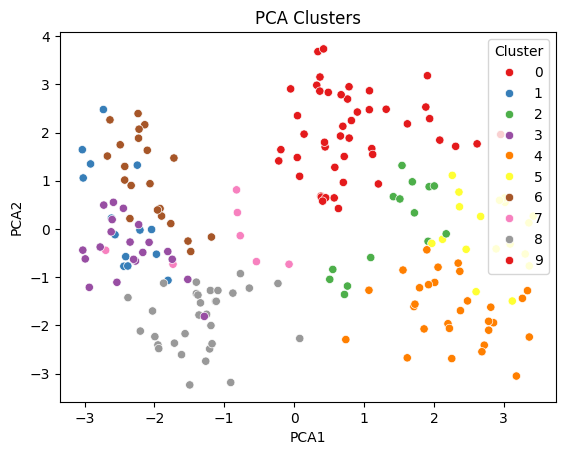

In [39]:
# 📊 Step 5: Visualize PCA
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('PCA Clusters')
plt.show()


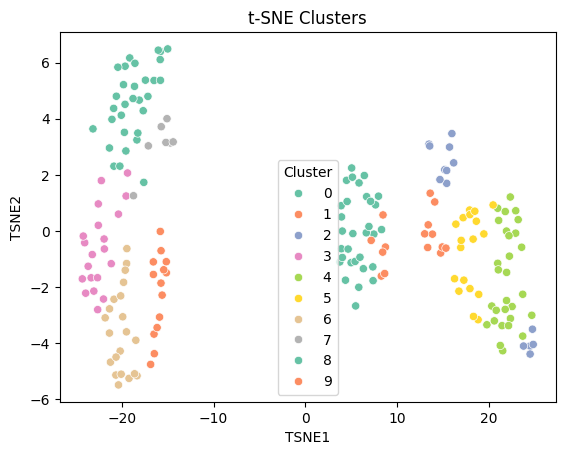

In [40]:
# 🔮 Step 6: Try t-SNE for Comparison
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(scaled)

df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]

sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2')
plt.title('t-SNE Clusters')
plt.show()


💡 1. What is perplexity in t-SNE?
Perplexity controls how t-SNE balances local vs. global structure in the data.

- It's like a guess about how many neighbors each point has.
- Lower perplexity → focuses on local clusters.
- Higher perplexity → keeps more global structure.

✅ Tip: Try values between 5–50. Default is 30. Try 10, 30, 50 and see how cluster shapes change.

In [41]:
# 📁 Step 7: Save Clustered Data
df.to_csv("segmented_customers.csv", index=False)

💡 Insights You Can Draw:

- Which cluster spends the most?
- Does income vs. score differ by gender?
- Target segment for luxury or budget ads?

In [ ]:
# ✅ Example: Cluster Profiling
df['Cluster'] = labels  # from KMeans
print(df.groupby('Cluster').mean())

               Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                          
0        44.387097           49.967742               33.967742   
1        50.428571           44.142857               23.071429   
2        49.571429           95.642857               68.857143   
3        49.850000           96.550000               65.450000   
4        27.724138           78.724138               50.241379   
5        22.944444           81.000000               59.888889   
6        48.190476           40.714286               70.809524   
7        28.142857           71.285714               32.857143   
8        29.516129           85.548387               45.903226   
9        41.266667           41.066667               76.933333   

         Membership Years      PCA1      PCA2      TSNE1     TSNE2  Gender_1  
Cluster                                                                       
0                5.806452  0.504701  1.769145   5

Cluster
0    33.967742
1    23.071429
2    68.857143
3    65.450000
4    50.241379
5    59.888889
6    70.809524
7    32.857143
8    45.903226
9    76.933333
Name: Spending Score (1-100), dtype: float64
Cluster
0    44.387097
1    50.428571
2    49.571429
3    49.850000
4    27.724138
5    22.944444
6    48.190476
7    28.142857
8    29.516129
9    41.266667
Name: Age, dtype: float64
         count       mean        std   min    25%    50%     75%    max
Cluster                                                                
0         31.0  49.967742  21.604759  20.0  34.00   45.0   66.50   88.0
1         14.0  44.142857  15.416560  21.0  31.75   43.5   54.75   69.0
2         14.0  95.642857  20.544912  51.0  85.25  105.0  111.75  115.0
3         20.0  96.550000  15.243549  70.0  85.25   99.5  109.25  114.0
4         29.0  78.724138  24.692244  34.0  65.00   77.0   88.00  119.0
5         18.0  81.000000  19.955834  44.0  70.25   82.5   92.00  113.0
6         21.0  40.714286  13.939666 

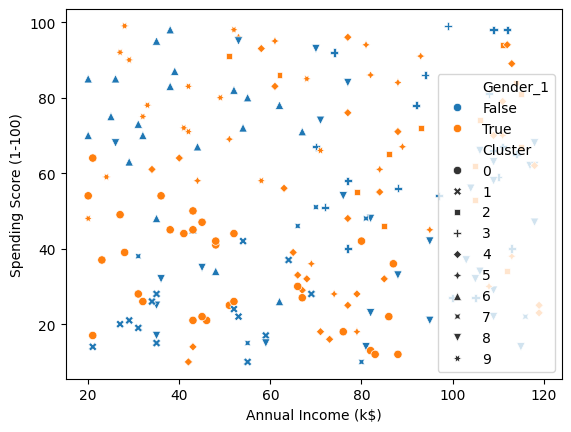

In [ ]:
#Insights


# 1. Which cluster spends the most?
print(df.groupby('Cluster')['Spending Score (1-100)'].mean())

# 2. Does income vs. score differ by gender?
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender_1', style='Cluster')

# 3. What age group is in each cluster?
print(df.groupby('Cluster')['Age'].mean())

# 4. Income range per cluster
print(df.groupby('Cluster')['Annual Income (k$)'].describe())


✅ STEP-BY-STEP CLUSTER PROFILING TEMPLATE

Assume:
You have a df with original features.
Clusters are in df['Cluster'].

In [50]:
# 1️⃣ Basic Stats per Cluster
print(df.groupby('Cluster').mean())
print(df.groupby('Cluster').median())
print(df['Cluster'].value_counts())

               Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                          
0        44.387097           49.967742               33.967742   
1        50.428571           44.142857               23.071429   
2        49.571429           95.642857               68.857143   
3        49.850000           96.550000               65.450000   
4        27.724138           78.724138               50.241379   
5        22.944444           81.000000               59.888889   
6        48.190476           40.714286               70.809524   
7        28.142857           71.285714               32.857143   
8        29.516129           85.548387               45.903226   
9        41.266667           41.066667               76.933333   

         Membership Years      PCA1      PCA2      TSNE1     TSNE2  Gender_1  
Cluster                                                                       
0                5.806452  0.504701  1.769145   5

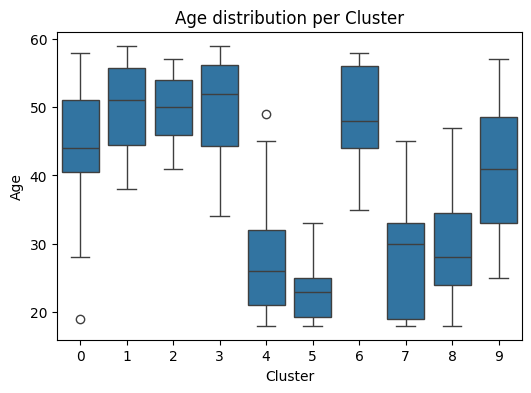

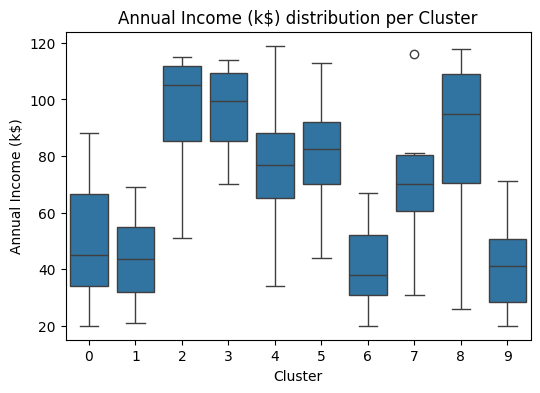

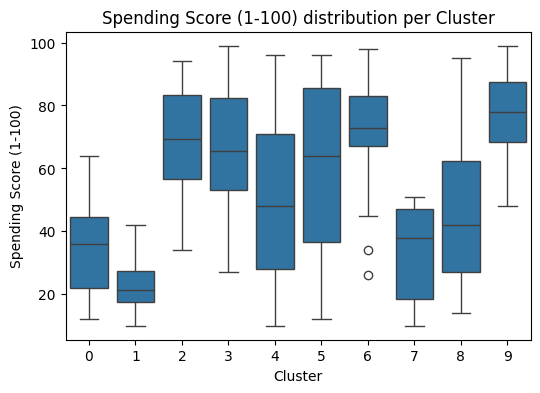

In [52]:
# 2️⃣ Plot Distribution of Each Feature per Cluster
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f"{feature} distribution per Cluster")
    plt.show()

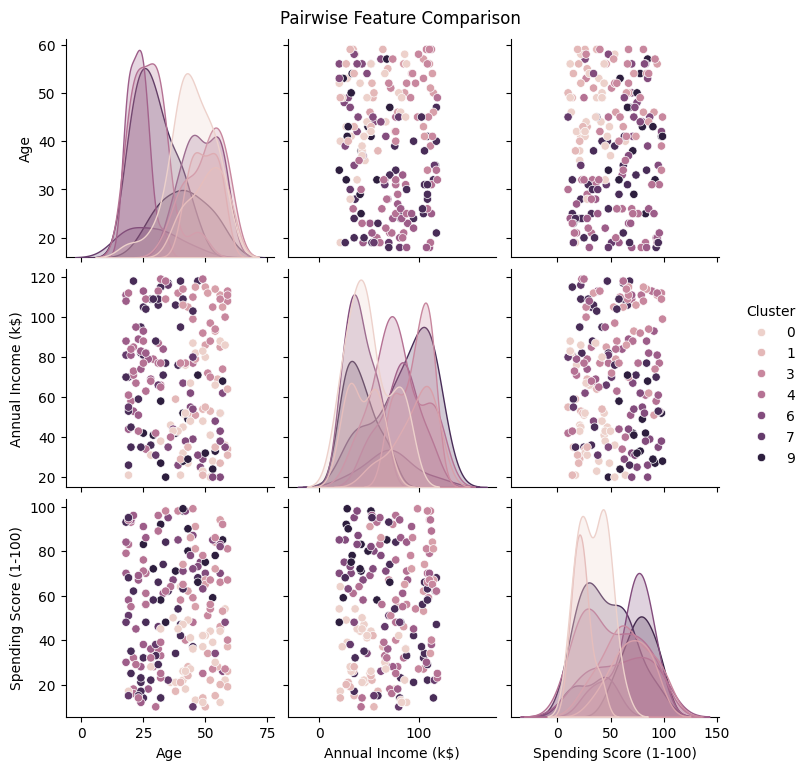

In [53]:
# 4️⃣ Pairwise Comparison
sns.pairplot(df, hue='Cluster', vars=features)
plt.suptitle("Pairwise Feature Comparison", y=1.02)
plt.show()

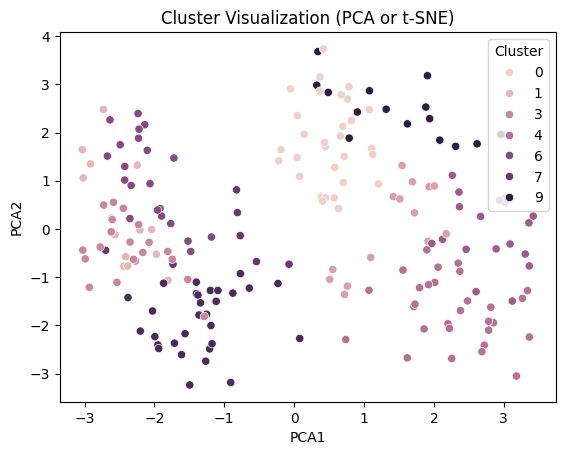

In [54]:
# 5️⃣ 2D Cluster Visualization (t-SNE or PCA)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df)
plt.title("Cluster Visualization (PCA or t-SNE)")
plt.show()

In [56]:
# 6️⃣ Real-World Insights
# Luxury segment
luxury = df[(df['Annual Income (k$)'] > 70) & (df['Spending Score (1-100)'] > 70)]
print("Luxury segment distribution:", luxury['Cluster'].value_counts())

# Low Income but High Spend
budget_spenders = df[(df['Annual Income (k$)'] < 40) & (df['Spending Score (1-100)'] > 60)]
print("Budget spenders clusters:", budget_spenders['Cluster'].value_counts())

Luxury segment distribution: Cluster
3    7
4    6
2    5
5    4
8    2
Name: count, dtype: int64
Budget spenders clusters: Cluster
6    11
9     5
0     1
4     1
8     1
Name: count, dtype: int64


In [57]:
# 7️⃣ Export Cluster Segments (for Marketing, etc.)
for cluster in df['Cluster'].unique():
    df[df['Cluster'] == cluster].to_csv(f"cluster_{cluster}.csv", index=False)


✅ Output: You now know:
- Who are your top spenders
- Who are price sensitive
- Which cluster is dominant
- Which demographic prefers what
- Can take data-driven decisions (ads, emails, offers)

In [ ]:
# 3️⃣ Demographic Counts (if available)
print(df.groupby('Cluster')['Gender'].value_counts())

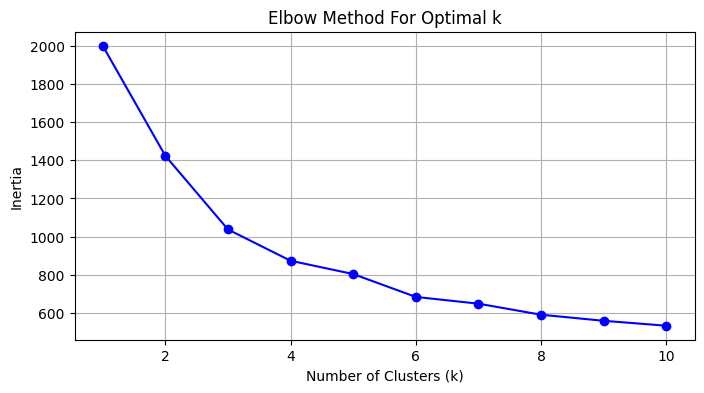

In [34]:
# 🔎 1. Elbow Method – How does inertia (within-cluster variance) change as k increases?

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, 'o-', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

#📌 What to look for:
# Look for the “elbow” point — where the drop in inertia slows down. That’s your optimal k.


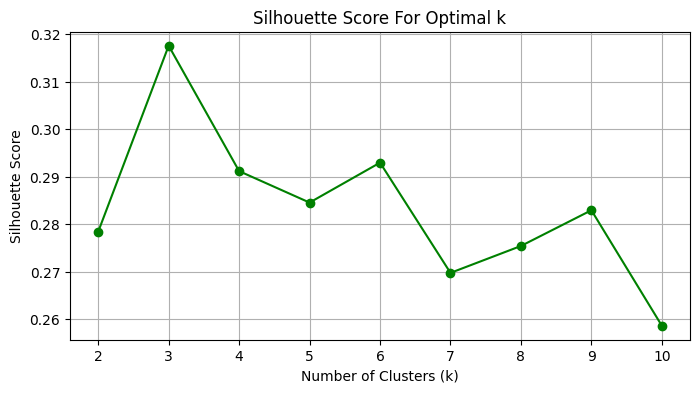

In [35]:
# 🧪 2. Silhouette Score – Measures how well points fit within their cluster (range: -1 to 1)
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled)
    score = silhouette_score(scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), sil_scores, 'o-', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.grid(True)
plt.show()

# 📌 What to look for:
# The k with the highest silhouette score is the most “naturally” separated cluster config.



🧪 2. What is Silhouette Score?
Silhouette Score = how well a point fits in its cluster vs. other clusters.

Formula:

silhouette = (b - a) / max(a, b)
Where:

a = average distance to same-cluster points.
b = average distance to nearest other cluster.

Score ranges:

Close to 1 → very good clusters.
Around 0 → overlapping clusters.
Negative → wrongly assigned points.

Use it to compare k values and pick the one with highest score.

✅ Once You’ve Found the Best k:
Update this line:

# kmeans = KMeans(n_clusters=BEST_K, random_state=42)

🎯 Real-World Business Insights:
Business Question	            Code Idea
--------------------------------------------------------------
Who are the luxury customers?	Filter cluster with high income + score
Budget segment for offers?	    Cluster with low income + high score
Which cluster has more women/men?	df.groupby('Cluster')['Gender'].value_counts()
Visualize clusters in 2D	    Use PCA or t-SNE + scatter plot
Send targeted emails	        Export emails by cluster

🔍 3. How to Get Insights After Clustering (PCA or t-SNE)?
After dimensionality reduction and clustering, go back to original features to profile each cluster.

In [37]:
# ✅ Example: Cluster Profiling
df['Cluster'] = labels  # from KMeans
print(df.groupby('Cluster').mean())


               Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                          
0        44.387097           49.967742               33.967742   
1        50.428571           44.142857               23.071429   
2        49.571429           95.642857               68.857143   
3        49.850000           96.550000               65.450000   
4        27.724138           78.724138               50.241379   
5        22.944444           81.000000               59.888889   
6        48.190476           40.714286               70.809524   
7        28.142857           71.285714               32.857143   
8        29.516129           85.548387               45.903226   
9        41.266667           41.066667               76.933333   

         Membership Years      PCA1      PCA2      TSNE1     TSNE2  Gender_1  
Cluster                                                                       
0                5.806452  0.504701  1.769145   5